In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('data.csv', sep=',')
df.head()

,sentence,label
0,পর কির পোলা লেখতে ভুইলা গেলি নাকি বেইশ্যা খান কি।,হ্যাঁ
1,এই মৃত্যুর জন্য পাডা আরিপ দায়ী।,হ্যাঁ
2,তোর মতো উপ্রে নিচে বালে ভরা আমাজন জংগল নাই যে ...,হ্যাঁ
3,পদ্মাসেতুর জন্য বলে মানুষের কল্লা দরকার তাহলে ...,হ্যাঁ
4,পাটার উপ্রে তর বিচি রাইখা পুতা দিয়া ছেচা দিমু।,হ্যাঁ


In [3]:
df.isnull().sum()

sentence    0
label       0
dtype: int64

In [4]:
df['label'].value_counts()

না       674
হ্যাঁ    665
Name: label, dtype: int64

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
df['length'] = df['sentence'].apply(len)
df.head()

,sentence,label,length
0,পর কির পোলা লেখতে ভুইলা গেলি নাকি বেইশ্যা খান কি।,হ্যাঁ,49
1,এই মৃত্যুর জন্য পাডা আরিপ দায়ী।,হ্যাঁ,31
2,তোর মতো উপ্রে নিচে বালে ভরা আমাজন জংগল নাই যে ...,হ্যাঁ,75
3,পদ্মাসেতুর জন্য বলে মানুষের কল্লা দরকার তাহলে ...,হ্যাঁ,81
4,পাটার উপ্রে তর বিচি রাইখা পুতা দিয়া ছেচা দিমু।,হ্যাঁ,46


In [30]:
import seaborn as sns

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001D776EA06A0>,
      dtype=object)

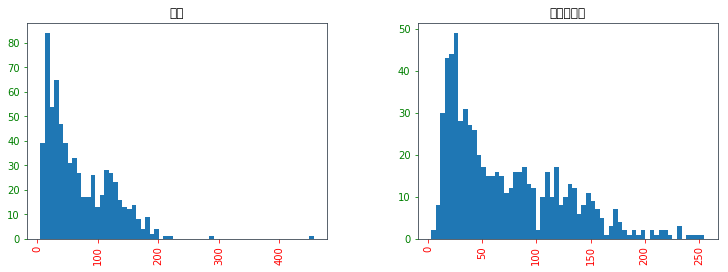

In [33]:
df.hist(column = 'length',by='label',bins=60,figsize=(12,4))

In [5]:
X = df['sentence']
y = df['label']

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()

X_train_counts = count_vect.fit_transform(X_train)
X_train_counts.shape

(897, 888)

In [8]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()

X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

(897, 888)

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

X_train_tfidf = vectorizer.fit_transform(X_train) # remember to use the original X_train set
X_train_tfidf.shape

(897, 888)

In [10]:
from sklearn.svm import LinearSVC
clf = LinearSVC()
clf.fit(X_train_tfidf,y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [11]:
from sklearn.pipeline import Pipeline
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.svm import LinearSVC

text_clf = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', LinearSVC()),
])

# Feed the training data through the pipeline
text_clf.fit(X_train, y_train)  

Pipeline(memory=None,
     steps=[('tfidf', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,...ax_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0))])

In [12]:
# Form a prediction set
predictions = text_clf.predict(X_test)

In [13]:
# Report the confusion matrix
from sklearn import metrics
print(metrics.confusion_matrix(y_test,predictions))

[[164  69]
 [ 62 147]]


In [14]:
# Print a classification report
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

          না       0.73      0.70      0.71       233
       হ্যাঁ       0.68      0.70      0.69       209

   micro avg       0.70      0.70      0.70       442
   macro avg       0.70      0.70      0.70       442
weighted avg       0.70      0.70      0.70       442



In [15]:
# Print the overall accuracy
print(metrics.accuracy_score(y_test,predictions))

0.7036199095022625


In [16]:
from sklearn.naive_bayes import MultinomialNB
# Naïve Bayes:
text_clf_nb = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', MultinomialNB()),
])

In [17]:
text_clf_nb.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('tfidf', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,...rue,
        vocabulary=None)), ('clf', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [18]:
# Form a prediction set
predictions = text_clf_nb.predict(X_test)

In [19]:
# Report the confusion matrix
from sklearn import metrics
print(metrics.confusion_matrix(y_test,predictions))

[[166  67]
 [ 54 155]]


In [20]:
# Print a classification report
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

          না       0.75      0.71      0.73       233
       হ্যাঁ       0.70      0.74      0.72       209

   micro avg       0.73      0.73      0.73       442
   macro avg       0.73      0.73      0.73       442
weighted avg       0.73      0.73      0.73       442



In [21]:
print(metrics.accuracy_score(y_test,predictions))

0.7262443438914027
